In [5]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_df = pd.read_csv('./new_train.csv')
train_df = train_df.select_dtypes(['number'])
train_df = train_df.fillna(train_df.mean())
test_df = pd.read_csv('./new_test.csv')
test_df = test_df.select_dtypes(['number'])
test_df = test_df.fillna(test_df.mean())
test_df.head()
print(train_df.isnull().sum())


MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [7]:
# Find and check if there are still missing values
for i, r in train_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


for i, r in test_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


<ipython-input-8-4b1cdfcf3854>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regr.fit(x_train, y_train)


[127603.5  156992.   179280.58 181287.15 197117.21 185027.8  168803.5
 176723.44 180257.92 120362.98]


C:\Users\teres\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\teres\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\teres\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\teres\AppData\Roaming\Python\Python39\site-packages\sklearn\model_s

Accuracy (R^2): 0.8523119716356105


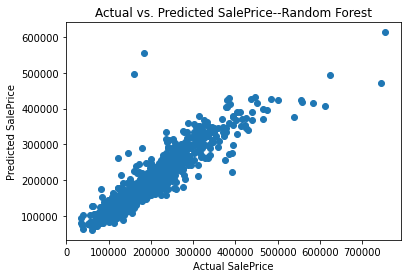

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

# RandomForestRegressor model
rf_regr = RandomForestRegressor(n_estimators=100, random_state=0) 

# define the training data
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df[['SalePrice']]

# Fit and predict model to training data
rf_regr.fit(x_train, y_train)
predictions = rf_regr.predict(test_df)

# Print first ten predictions
print(predictions[0:10])

# Perform 6-fold cross-validation
scores = cross_val_score(rf_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Make cross-validated predictions
predictions = cross_val_predict(rf_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Plot actual vs. predicted sale prices
plt.scatter(train_df[['SalePrice']], predictions)
plt.title("Actual vs. Predicted SalePrice--Random Forest")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")

# Get accuracy of model from cross-validation
accuracy = metrics.r2_score(train_df[['SalePrice']], predictions)
print("Accuracy (R^2):", accuracy)
